### Select a Cab Compony to invest!

In [103]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta


In [104]:
df_cab = pd.read_csv('dataset/Cab_Data.csv')
df_city = pd.read_csv('dataset/City.csv')
df_cust = pd.read_csv('dataset/Customer_ID.csv')
df_trans = pd.read_csv('dataset/Transaction_ID.csv')

In [110]:
df_trans.shape

(440098, 3)

In [3]:
df_cab.head(2)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854

In [4]:
# Calculate profit
df_cab['Profit'] = df_cab['Price Charged']- df_cab['Cost of Trip']

In [5]:
print("max:", max(df_cab["Date of Travel"])) 
print("min:", min(df_cab["Date of Travel"]))

# (datetime(1899,12,30) + timedelta(days=max(df_cab["Date of Travel"]))).strftime("%Y-%m-%d")


max: 43465
min: 42371


In [6]:
df_cab["Date of Travel"] = df_cab["Date of Travel"].apply(lambda x:(datetime(1899,12,30) + timedelta(days=int(x))).strftime("%Y-%m-%d"))

In [7]:
print("max:", max(df_cab["Date of Travel"])) 
print("min:", min(df_cab["Date of Travel"]))

max: 2018-12-31
min: 2016-01-02


In [8]:
df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'])
# Add Year, Mounth and Day to the dataset
df_cab['Year'] = df_cab['Date of Travel'].dt.year
df_cab['Month'] = df_cab['Date of Travel'].dt.month
df_cab['Day'] = df_cab['Date of Travel'].dt.day

In [9]:
df_cab.head(2)

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  Profit  Year  Month  Day  
0         370.95       313.635  57.315  2016      1    8  
1         358.52       334.854  23.666  2016      1    6

In [10]:
df_city.head(2)

City   Population      Users
0  NEW YORK NY   8,405,837    302,149 
1   CHICAGO IL   1,955,130    164,468

In [11]:
# df_city['Population'] = df_city['Population'].str.replace(',','')

In [12]:
def replace_comma(x):
    return int(x.replace(',', ''))
    

In [13]:
df_city["Population"] = df_city["Population"].apply(lambda x:replace_comma(x))
df_city["Users"] = df_city["Users"].apply(lambda x:replace_comma(x))


In [14]:
df_city.head(2)

City  Population   Users
0  NEW YORK NY     8405837  302149
1   CHICAGO IL     1955130  164468

In [15]:
df_cust.head(2)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237

In [16]:
df_trans.head(2)

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card

### Merging Datasets

In [17]:
df = df_cab.merge(df_trans, on='Transaction ID').merge(df_cust, on='Customer ID').merge(df_city, on= 'City')

In [18]:
# Save the new data set
df.to_csv('dataset/mergeddataset.csv')

In [19]:
df = pd.read_csv('dataset/mergeddataset.csv', index_col=0)

### Exploratory Data Analysis (EDA)

In [20]:
# Determine how many rows are duplicated.
print("Number of duplicated rows in the dataset: ", df.duplicated().sum())

Number of duplicated rows in the dataset:  0


In [21]:
# Determine null values in the dataset
print("Number of null values: ", df.isnull().sum().sum())

Number of null values:  0


In [22]:
print('Number of samples: ', df.shape[0])
print('Number of Features: ', df.shape[1])

Number of samples:  359392
Number of Features:  18


In [23]:
df.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

              Profit           Year          Month            Day  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      137.253198    2017.045199       7.500434      15.628447   
std       160.311840       0.800239       3.445095       8.827151   
min      -220.060000    2016.000000       1.000000       1.000000   
25%        28.012000    2016.000000       5.000000       8.000000   
50%        81.962000    2017.000000       8.000000      16.000000   
75%       190.030000    2018.000000      10.000000      23.000000   
max      1463.966000    2018.000000      12.000000      31.000000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25%      2705.000000      25.000000         8424.000000  6.712380e+05   
50%      7459.000000      33.000000        14685.000000  1.595037e+06   
75%     36078.000000      42.000000        21035.000000  8.405837e+06   
max     60000.000000      65.000000        35000.000000  8.405837e+06   

               Users  
count  359392.000000  
mean   158365.582267  
std    100850.051020  
min      3643.000000  
25%     80021.000000  
50%    144132.000000  
75%    302149.000000  
max    302149.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Profit              359392 non-null  float64
 8   Year                359392 non-null  int64  
 9   Month               359392 non-null  int64  
 10  Day                 359392 non-null  int64  
 11  Customer ID         359392 non-null  int64  
 12  Payment_Mode        359392 non-null  object 
 13  Gender              359392 non-null  object 
 14  Age                 359392 non-null  int64  
 15  Income (USD/Month)  359392 non-nul

#### Correlation

The degree to which two variables are linearly connected is known as correlation.

Found this article useful: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

##### Pearson Correlation

In [99]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

##### Spearman Correlation

In [100]:
scorr = df.corr(method='spearman')
scorr.style.background_gradient(cmap='coolwarm')



The heatmaps show a strong relationship between 'KM Travelled,' 'Price Charged,' and 'Cost of Trip.' Additionally, and this is rather evident, there is a significant correlation between the 'Population' and 'Users.' 

### Normalizing the Profit
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
import seaborn as sns
sns.set_theme()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


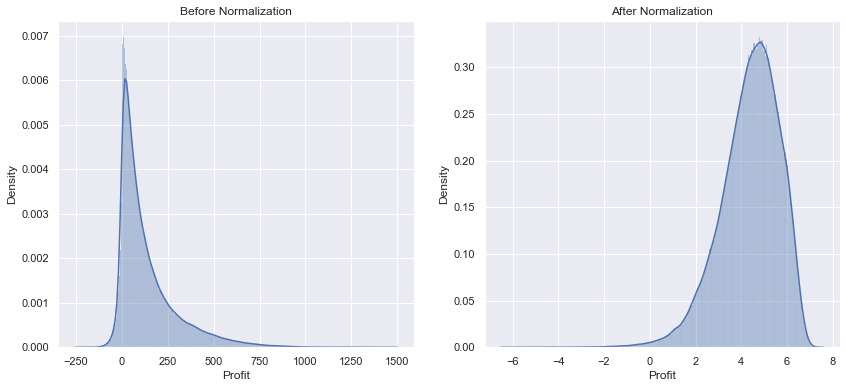

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(df['Profit'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[0])
ax[0].set_title('Before Normalization')

# use log1p to normalize
df['Profit'] = np.log1p(df['Profit'])
ax[1].set_title('After Normalization')
sns.histplot(df['Profit'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[1])
plt.show()

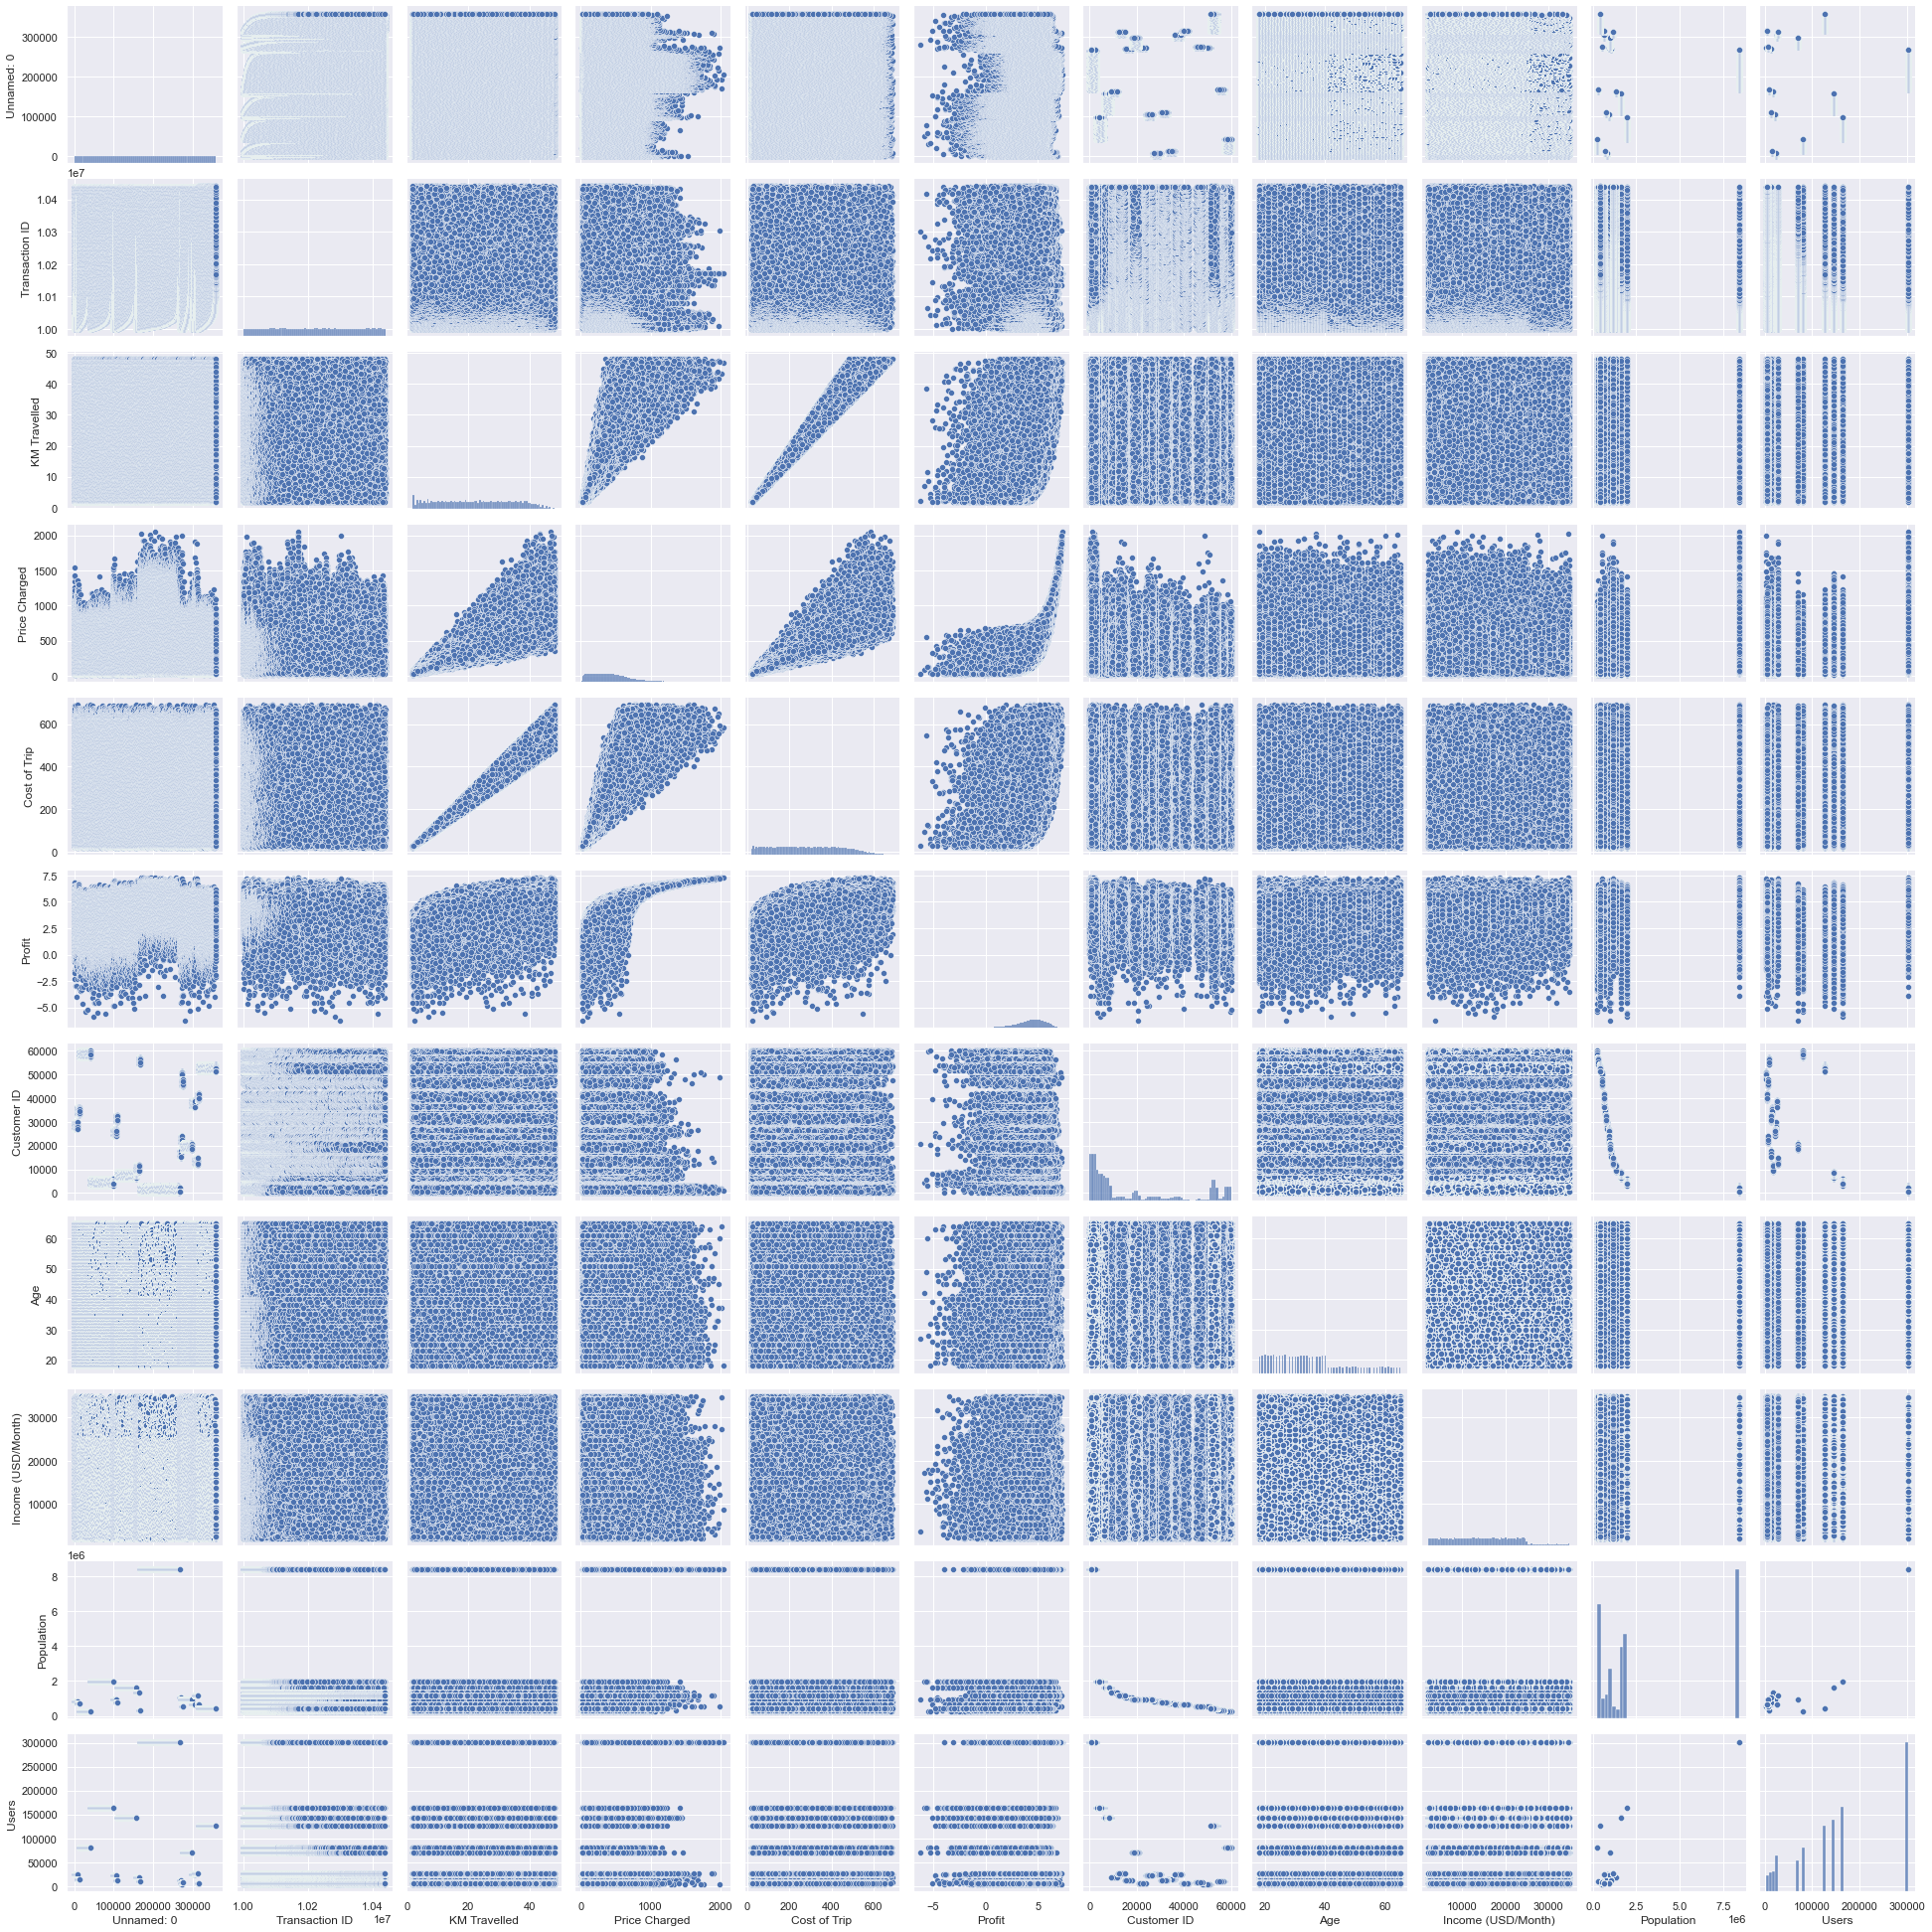

In [ ]:
sns.pairplot(df)

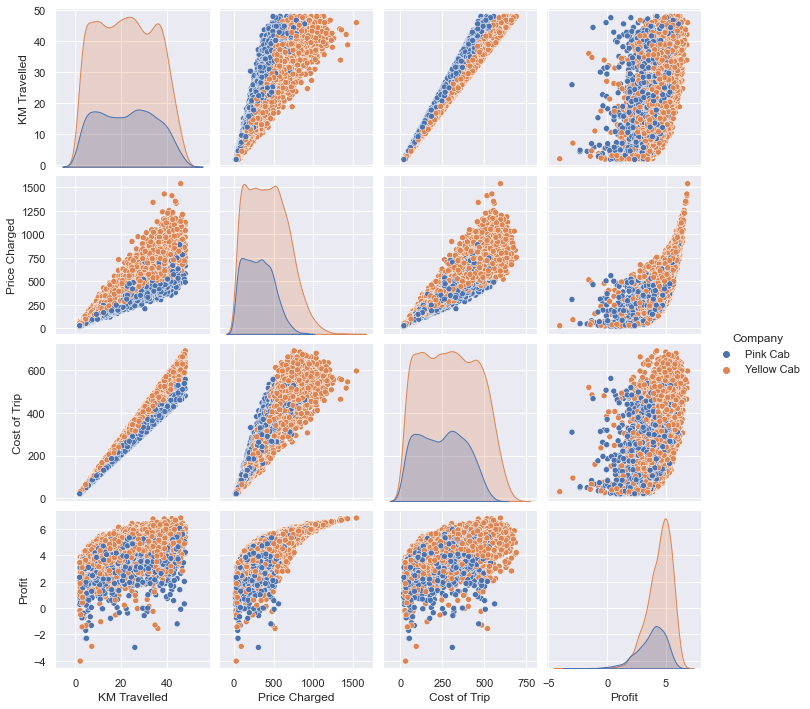

In [28]:
sns.pairplot(df[['Company','KM Travelled','Price Charged','Cost of Trip','Profit']].head(1000),hue = 'Company')

In [29]:
df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10351127     2018-07-21  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-23  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-06    Pink Cab     ATLANTA GA   
4             10320494     2018-04-21  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-03  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-13  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-06  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-02  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-08-30  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip    Profit  Year  Month  Day  \
0              30.45         370.95      313.6350  4.065859  2016      1    8   
1              26.19         598.70      317.4228  5.642890  2018      7   21   
2              42.55         792.05      597.4020  5.276317  2018     11   23   
3              28.62         358.52      334.8540  3.205426  2016      1    6   
4              36.38         721.10      467.1192  5.541188  2018      4   21   
...              ...            ...           ...       ...   ...    ...  ...   
359387         38.40         668.93      525.3120  4.974096  2018      3    3   
359388          3.57          67.60       44.5536  3.179985  2018      4   13   
359389         23.46         331.97      337.8240       NaN  2018      7    6   
359390         27.60         358.23      364.3200       NaN  2018      8    2   
359391         34.24         453.11      427.3152  3.288208  2018      8   30   

        Customer ID Payment_Mode  Gender  Age  Income (USD/Month)  Population  \
0             29290         Card    Male   28               10813      814885   
1             29290         Cash    Male   28               10813      814885   
2             29290         Card    Male   28               10813      814885   
3             27703         Card    Male   27                9237      814885   
4             27703         Card    Male   27                9237      814885   
...             ...          ...     ...  ...                 ...         ...   
359387        51406         Cash  Female   29                6829      418859   
359388        51406         Cash  Female   29                6829      418859   
359389        51406         Card  Female   29                6829      418859   
359390        51406         Cash  Female   29                6829      418859   
359391        51406         Card  Female   29                6829      418859   

         Users  
0        24701  
1        24701  
2        24701  
3        24701  
4        24701  
...        ...  
359387  127001  
359388  127001  
359389  127001  
359390  127001  
359391  127001  

[359392 rows x 18 columns]

#### Categorical Data

In [34]:
df_cat = df.select_dtypes(include = 'object').copy()

In [37]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date of Travel  359392 non-null  object
 1   Company         359392 non-null  object
 2   City            359392 non-null  object
 3   Payment_Mode    359392 non-null  object
 4   Gender          359392 non-null  object
dtypes: object(5)
memory usage: 16.5+ MB


In [38]:
df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [39]:
df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [42]:
len(df['City'].unique())

19

In [40]:
df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [41]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Frequency Distribution¶

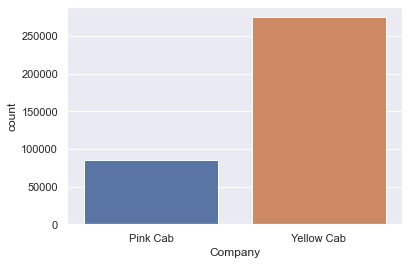

In [67]:
sns.countplot(data = df_cat, x = 'Company');

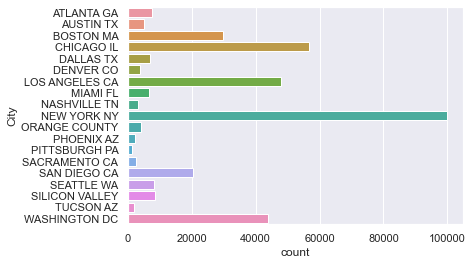

In [68]:
sns.countplot(data = df_cat, y = 'City');

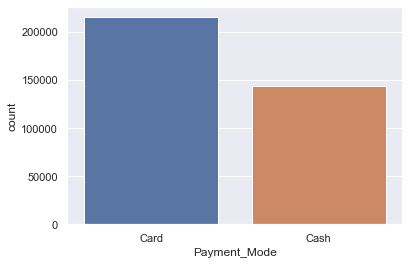

In [66]:
sns.countplot(data = df_cat, x = 'Payment_Mode');

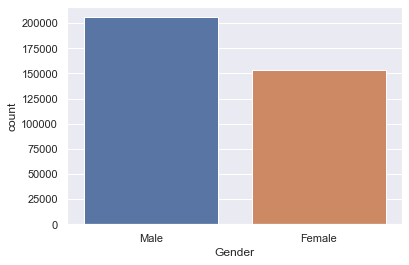

In [65]:
sns.countplot(data = df_cat, x = 'Gender');

<AxesSubplot:xlabel='count', ylabel='City'>

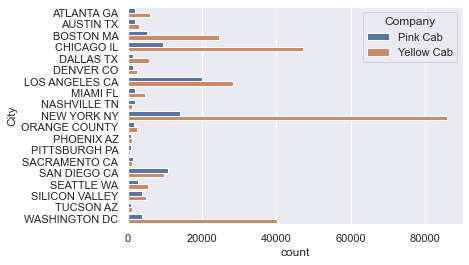

In [55]:
sns.countplot(data=df, y="City", hue="Company")

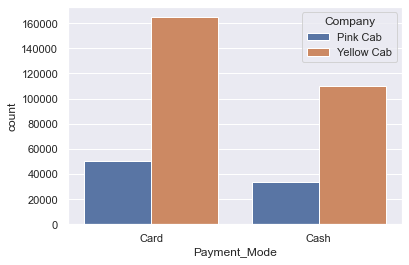

In [63]:
sns.countplot(data=df, x="Payment_Mode", hue="Company");

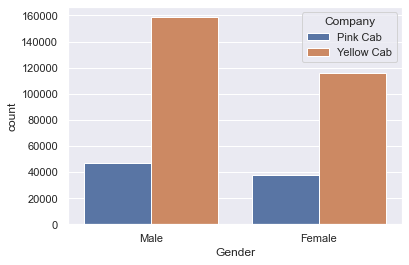

In [64]:
sns.countplot(data=df, x="Gender", hue="Company");

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

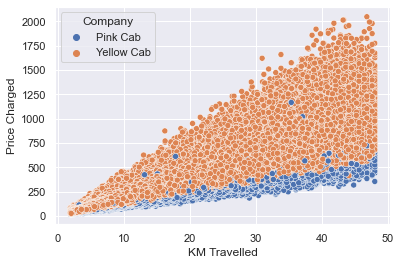

In [69]:
sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')

<AxesSubplot:xlabel='Company', ylabel='Age'>

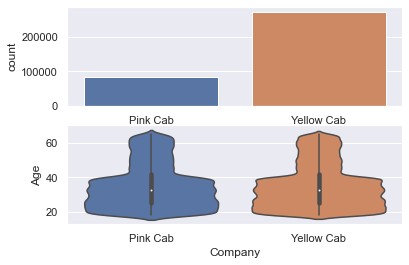

In [86]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df_cat, x = 'Company', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='Company', y='Age', ax=ax2)
sns.violinplot(data = df, x='Company', y='Age' , ax = ax2)

<AxesSubplot:xlabel='Company', ylabel='Age'>

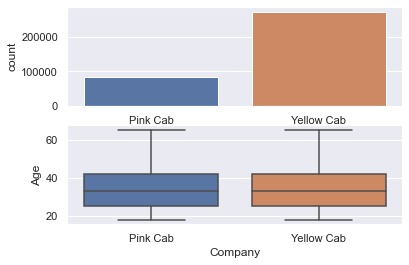

In [101]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df_cat, x = 'Company', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='Company', y='Age', ax=ax2)


In [ ]:
sns.boxplot(data = df, x='Company', y='Age')

In [30]:
# Which company has maximum cab users at a particular time period?

In [31]:
df_city

City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021

In [32]:
a = df.groupby(['Company','Users']).sum()

In [ ]:
a

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Company    Users                                                               
Pink Cab   3643        6973684033      15400.66      186785.72  1.696780e+05   
           5712        8166842100      18022.97      258247.63  1.989581e+05   
           6133        8827731285      18789.74      242197.74  2.066013e+05   
           7044       13637793045      30154.14      387007.82  3.316838e+05   
           9270       18816105954      41474.17      519277.05  4.549925e+05   
           12421      14252199213      31308.15      385026.22  3.444413e+05   
           12994      15474748587      33608.50      472096.66  3.701008e+05   
           14978      19117094048      41038.42      598572.71  4.511274e+05   
           17675      20481987305      44644.45      652664.63  4.903634e+05   
           22157      14100582137      30389.26      358835.40  3.341053e+05   
           24701      18007031833      39715.17      532355.80  4.363057e+05   
           25063      27903627995      62000.37      795623.69  6.828424e+05   
           27247      38824116419      86540.61     1292411.50  9.521610e+05   
           69995     109062043953     240703.87     3286316.40  2.648427e+06   
           80021      53017566077     117933.51     1558660.02  1.296658e+06   
           127001     37742794154      82998.95     1107506.08  9.137397e+05   
           144132    203031561953     449656.77     6071225.76  4.945494e+06   
           164468     95701629177     210726.13     2636186.14  2.317464e+06   
           302149    142940891311     315967.27     4987254.36  3.475780e+06   
Yellow Cab 3643        6451024210      14305.10      255752.92  1.876947e+05   
           5712       11574359289      25206.84      414332.63  3.333615e+05   
           6133       12269535815      27035.34      514484.90  3.571404e+05   
           7044       10560085180      23707.06      374604.13  3.126020e+05   
           9270       11951963933      26850.57      439831.08  3.545834e+05   
           12421      24849280916      54561.60     1077505.29  7.205052e+05   
           12994      25253665284      55218.19     1082776.55  7.277705e+05   
           14978      30971960840      68168.88     1278569.79  8.993141e+05   
           17675      45586589916     100773.72     1927470.57  1.331471e+06   
           22157      57605701735     127392.79     2783594.51  1.679591e+06   
           24701      59229968168     128928.59     2447885.92  1.701503e+06   
           25063      53786840576     118903.62     2058692.57  1.566789e+06   
           27247      48276695087     107172.36     2391690.65  1.415236e+06   
           69995     100332115178     219799.82     3850064.19  2.900790e+06   
           80021     250331561631     552454.67     8801095.40  7.294378e+06   
           127001    409091108411     906038.71    15259197.75  1.196009e+07   
           144132    287769460652     639078.88    11724398.65  8.438422e+06   
           164468    482834967650    1070978.26    17205132.38  1.413654e+07   
           302149    878452888880    1932842.47    51966807.31  2.551573e+07   

                          Profit  Customer ID      Age  Income (USD/Month)  \
Company    Users                                                             
Pink Cab   3643      1419.640662     33731643    24344             9763944   
           5712      2725.103012     32343549    28451            12176362   
           6133              NaN     19420577    30626            13024928   
           7044              NaN     62005434    47715            20268352   
           9270      4506.740847    102146995    63181            27442951   
           12421     3277.731702     43895620    49024            20948027   
           12994     5194.559910     24943569    53544            22984796   
           14978     6866.710228     64471253    66636            27765238   
           17675     6798.138850     2

In [ ]:
newdf = pd.DataFrame()
newdf['Company'] = df['Company']
newdf['City'] = df['City']
newdf['Users'] = df['Users']

In [ ]:
newdf

Company           City   Users
0         Pink Cab     ATLANTA GA   24701
1       Yellow Cab     ATLANTA GA   24701
2       Yellow Cab     ATLANTA GA   24701
3         Pink Cab     ATLANTA GA   24701
4       Yellow Cab     ATLANTA GA   24701
...            ...            ...     ...
359387  Yellow Cab  WASHINGTON DC  127001
359388  Yellow Cab  WASHINGTON DC  127001
359389  Yellow Cab  WASHINGTON DC  127001
359390  Yellow Cab  WASHINGTON DC  127001
359391  Yellow Cab  WASHINGTON DC  127001

[359392 rows x 3 columns]

### Time Series

In [52]:
df = pd.read_csv('dataset/mergeddataset.csv', index_col='Date of Travel', parse_dates=True)

In [53]:
del df['Unnamed: 0']

In [54]:
# df.index = pd.to_datetime(df.index) if it is still not a DateTimeIndex
df.index

DatetimeIndex(['2016-01-08', '2018-07-21', '2018-11-23', '2016-01-06',
               '2018-04-21', '2018-05-04', '2018-10-27', '2016-01-02',
               '2016-09-21', '2017-06-23',
               ...
               '2018-10-04', '2017-12-06', '2018-03-15', '2018-01-02',
               '2017-12-17', '2018-03-03', '2018-04-13', '2018-07-06',
               '2018-08-02', '2018-08-30'],
              dtype='datetime64[ns]', name='Date of Travel', length=359392, freq=None)

In [42]:
df.rolling(window=30).mean()

/var/folders/25/zqkx9ff5403gvfyq_v06fpx80000gn/T/ipykernel_49622/2117164538.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['City', 'Company', 'Gender', 'Payment_Mode'], dtype='object')
  df.rolling(window=30).mean()


Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Date of Travel                                                              
2016-01-08                 NaN           NaN            NaN           NaN   
2018-07-21                 NaN           NaN            NaN           NaN   
2018-11-23                 NaN           NaN            NaN           NaN   
2016-01-06                 NaN           NaN            NaN           NaN   
2018-04-21                 NaN           NaN            NaN           NaN   
...                        ...           ...            ...           ...   
2018-03-03        1.028760e+07     20.903667     324.351000    272.038347   
2018-04-13        1.029169e+07     19.934667     314.095333    261.229067   
2018-07-06        1.029654e+07     20.036667     315.017333    263.840267   
2018-08-02        1.030165e+07     19.716667     305.024333    258.872267   
2018-08-30        1.030571e+07     20.060667     309.386000    263.261067   

                  Profit   Customer ID        Age  Income (USD/Month)  \
Date of Travel                                                          
2016-01-08           NaN           NaN        NaN                 NaN   
2018-07-21           NaN           NaN        NaN                 NaN   
2018-11-23           NaN           NaN        NaN                 NaN   
2016-01-06           NaN           NaN        NaN                 NaN   
2018-04-21           NaN           NaN        NaN                 NaN   
...                  ...           ...        ...                 ...   
2018-03-03      3.542044  51804.100000  31.366667         6464.900000   
2018-04-13      3.581157  51800.633333  31.733333         6464.033333   
2018-07-06           NaN  51797.166667  32.100000         6463.166667   
2018-08-02           NaN  51793.700000  32.466667         6462.300000   
2018-08-30           NaN  51790.233333  32.833333         6461.433333   

                Population     Users  
Date of Travel                        
2016-01-08             NaN       NaN  
2018-07-21             NaN       NaN  
2018-11-23             NaN       NaN  
2016-01-06             NaN       NaN  
2018-04-21             NaN       NaN  
...                    ...       ...  
2018-03-03        418859.0  127001.0  
2018-04-13        418859.0  127001.0  
2018-07-06        418859.0  127001.0  
2018-08-02        418859.0  127001.0  
2018-08-30        418859.0  127001.0  

[359392 rows x 10 columns]

<AxesSubplot:xlabel='Date of Travel'>

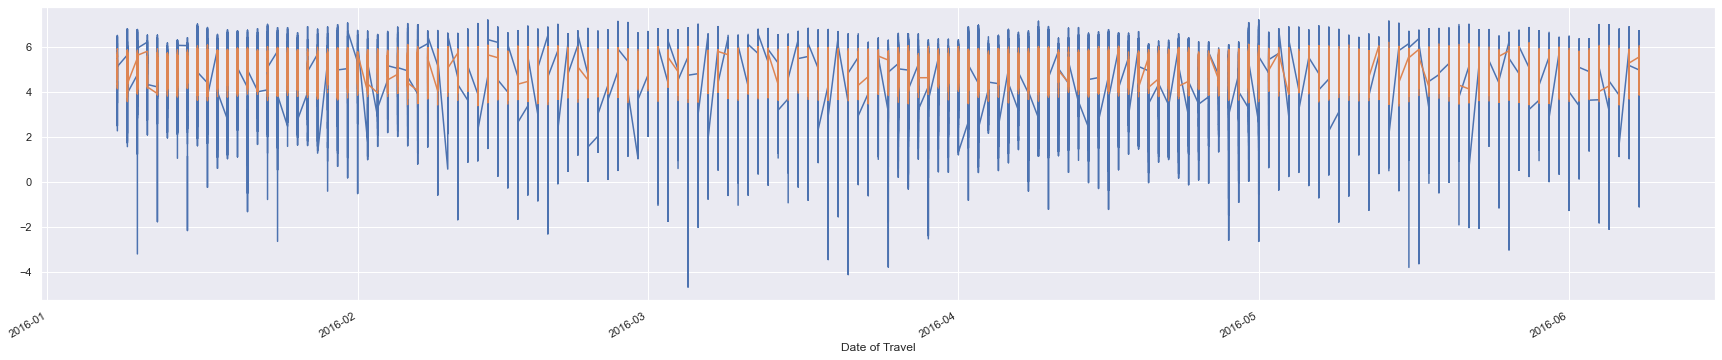

In [46]:
df['Profit']['2016-01-08':'2016-06-08'].plot(figsize=(30,6));
df['Profit']['2016-01-08':'2016-06-08'].rolling(window=30).mean().plot()
# ax.autoscale(axis='both', tight="True")